<a href="https://colab.research.google.com/github/Rajkdea123/Face-Mask-Detection/blob/main/Live_Face_Mask_Detection_App_From_Multile_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 [==============================] - 0s 126ms/step
User not wearing mask - probability: 0.9911623


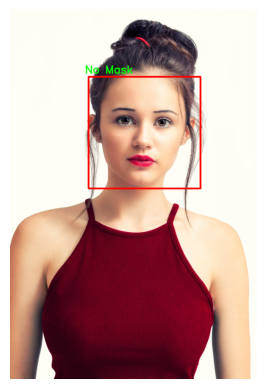

1/1 [==============================] - 0s 37ms/step
User not wearing mask - probability: 0.6920508


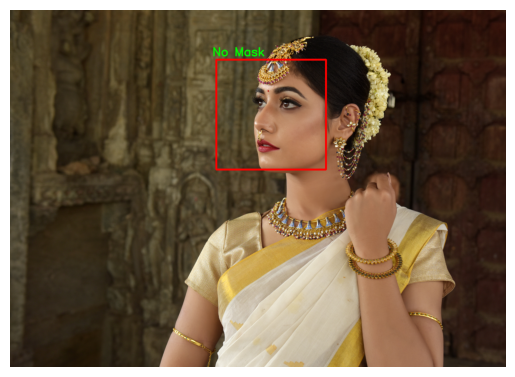

1/1 [==============================] - 0s 35ms/step
User not wearing mask - probability: 0.764504


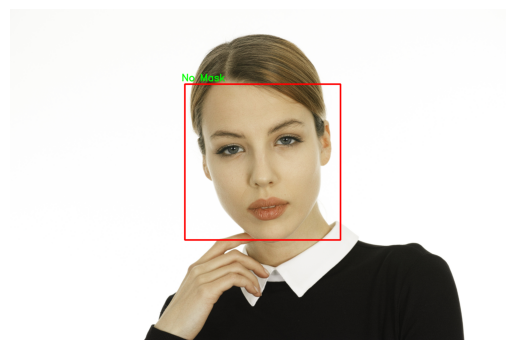

1/1 [==============================] - 0s 38ms/step
User not wearing mask - probability: 0.9982486


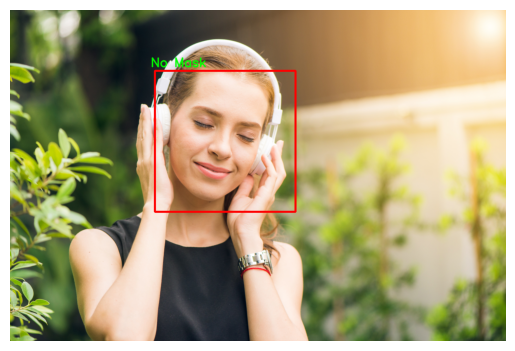

1/1 [==============================] - 0s 59ms/step
User with mask - prediction: 0.9999578


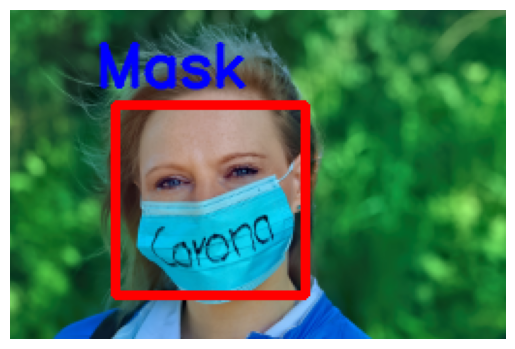

1/1 [==============================] - 0s 54ms/step
User with mask - prediction: 0.99663323


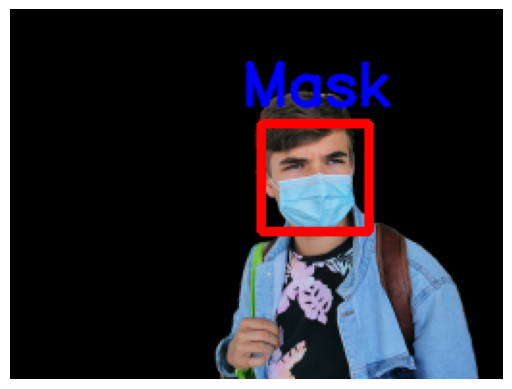

1/1 [==============================] - 0s 70ms/step
User with mask - prediction: 0.99892694


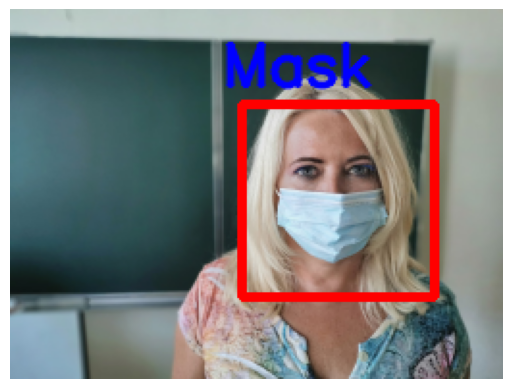

No faces found in the image!
1/1 [==============================] - 0s 57ms/step
User not wearing mask - probability: 0.9024755


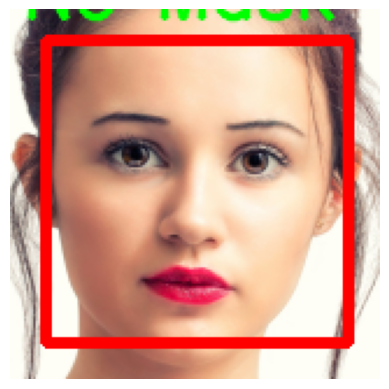

1/1 [==============================] - 0s 56ms/step
User not wearing mask - probability: 0.98819005


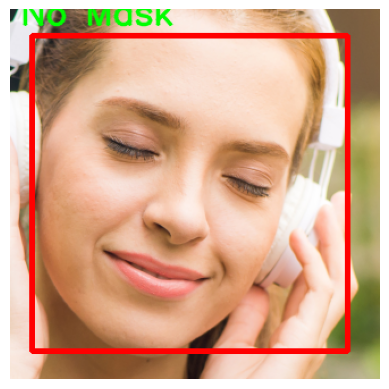

In [26]:
import cv2
import os
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Load the pre-trained model
model = load_model('/content/drive/MyDrive/model/model01.h5')

# Define the image dimensions for model input
img_width, img_height = 200, 200

# Load the Cascade face Classifier
face_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/live mask detection app/haarcascade_frontalface_default.xml")

# Parameters for text overlay
font = cv2.FONT_HERSHEY_SIMPLEX
org = (1, 1)
class_label = ''
fontScale = 1
color = (255, 0, 0)
thickness = 2

# Specify the path to the images directory
img_path = '/content/drive/MyDrive/live mask detection app/images'

# Read the list of image files in the directory
img_list = os.listdir(img_path)

for img_name in img_list:
    # Read image from file
    color_img = cv2.imread(os.path.join(img_path, img_name))

    if color_img is not None:
        # Resize the image
        scale = 20
        width = int(color_img.shape[1] * scale / 100)
        height = int(color_img.shape[0] * scale / 100)
        dim = (width, height)
        color_img = cv2.resize(color_img, dim, interpolation=cv2.INTER_AREA)

        # Convert to grayscale
        gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)

        # Detect faces in the grayscale image
        faces = face_cascade.detectMultiScale(gray_img, 1.1, 6)

        if len(faces) == 0:
            print("No faces found in the image!")
        else:
            # Iterate over the detected faces
            for (x, y, w, h) in faces:
                org = (x-10, y-10)

                # Extract the face region
                color_face = color_img[y:y+h, x:x+w]

                # Save the color_face to an image file
                cv2.imwrite('/content/drive/MyDrive/live mask detection app/images_%d.jpg' % img_count, color_face)

                # Load the saved image using load_img
                img = load_img('/content/drive/MyDrive/live mask detection app/images_%d.jpg' % img_count, target_size=(img_width, img_height))

                # Convert the image to array and normalize
                img_array = img_to_array(img) / 255

                # Expand the dimensions to match the model input shape
                img_expanded = np.expand_dims(img_array, axis=0)

                # Perform the prediction on the image
                pred_prob = model.predict(img_expanded)
                pred = np.argmax(pred_prob)

                if pred == 0:
                    print("User with mask - prediction:", pred_prob[0][0])
                    class_label = "Mask"
                    color = (255, 0, 0)
                    cv2.imwrite('faces/with_mask/%dface.jpg' % img_count, color_face)
                    cv2.rectangle(color_img, (x, y), (x+w, y+h), (0, 0, 255), 3)
                    cv2.putText(color_img, class_label, org, font, fontScale, color, thickness, cv2.LINE_AA)
                    cv2.imwrite('faces/with_mask/%dmask.jpg' % img_count, color_img)
                else:
                    print('User not wearing mask - probability:', pred_prob[0][1])
                    class_label = "No Mask"
                    color = (0, 255, 0)
                    cv2.imwrite('faces/without_mask/%dface.jpg' % img_count, color_face)
                    cv2.imwrite('faces/with_mask/%dno_mask.jpg' % img_count, color_img)

                cv2.rectangle(color_img, (x, y), (x+w, y+h), (0, 0, 255), 3)
                cv2.putText(color_img, class_label, org, font, fontScale, color, thickness, cv2.LINE_AA)

            # Display the image
            plt.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()

            cv2.waitKey()

# Close all windows
cv2.destroyAllWindows()
